In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("s12_exam_guide_churn.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [3]:
df.drop("RowNumber CustomerId".split(), axis=1, inplace=True)
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [4]:
df.corr()

/tmp/ipykernel_31385/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,0.000077
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,0.002222
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,-0.010196
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,0.014608
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,-0.015330
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,-0.011041
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,-0.004983
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,-0.001515
Exited,-0.026771,0.285296,-0.013656,0.118577,-0.047611,-0.006976,-0.156356,0.012490,1.000000,0.995693,-0.005849,-0.004628
Complain,-0.027048,0.283530,-0.013047,0.119124,-0.046357,-0.007095,-0.154741,0.012494,0.995693,1.000000,-0.004799,-0.002893


1.1. Grafique un correlation heatmap1 para ver cómo se relacionan las variables
(RowNumber y CustomerID no deberían estar incluidas). ¿Qué variables a primera
vista explican mejor la salida de los clientes?

/tmp/ipykernel_31385/2380516459.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr()))
/tmp/ipykernel_31385/2380516459.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, mask=mask, cmap='Blues')


<AxesSubplot: >

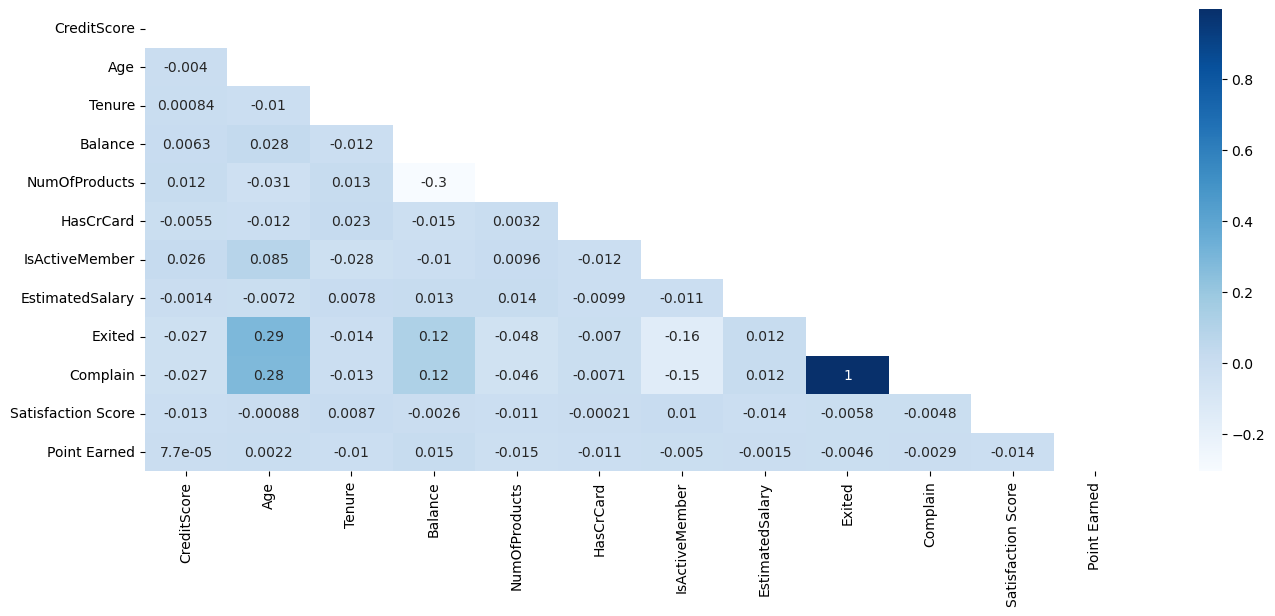

In [5]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot=True, mask=mask, cmap='Blues')

1.2. A continuación, entrene 2 modelos usando solo las 2 variables que más se
correlacionaron con la salida, uno de regresión logística y uno de árboles de decisión
(Training set 80% en ambos casos, profundidad=2 para el árbol, y random_state=0
en ambos casos también). De acuerdo al accuracy score, cuál modelo fue mejor en
el devset?

In [6]:
df["Exited"].value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

In [7]:
x = df["Complain Age".split()]
y = df[["Exited"]]
print(x.shape, y.shape)

(10000, 2) (10000, 1)


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [9]:
x_train.shape, x_test.shape

((8000, 2), (2000, 2))

In [10]:
y_train.shape, y_test.shape

((8000, 1), (2000, 1))

## Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=2, random_state=0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [12]:
df["Complain Age Exited".split()].head(10)

,Complain,Age,Exited
0,1,42,1
1,1,41,0
2,1,42,1
3,0,39,0
4,0,43,0
5,1,44,1
6,0,50,0
7,1,29,1
8,0,44,0
9,0,27,0


[Text(0.5, 0.8333333333333334, 'Complain <= 0.5\ngini = 0.325\nsamples = 8000\nvalue = [6367, 1633]\nclass = 0'),
 Text(0.25, 0.5, 'Age <= 47.5\ngini = 0.001\nsamples = 6360\nvalue = [6357, 3]\nclass = 0'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 5623\nvalue = [5622, 1]\nclass = 0'),
 Text(0.375, 0.16666666666666666, 'gini = 0.005\nsamples = 737\nvalue = [735, 2]\nclass = 0'),
 Text(0.75, 0.5, 'Age <= 36.5\ngini = 0.012\nsamples = 1640\nvalue = [10, 1630]\nclass = 1'),
 Text(0.625, 0.16666666666666666, 'gini = 0.047\nsamples = 330\nvalue = [8, 322]\nclass = 1'),
 Text(0.875, 0.16666666666666666, 'gini = 0.003\nsamples = 1310\nvalue = [2, 1308]\nclass = 1')]

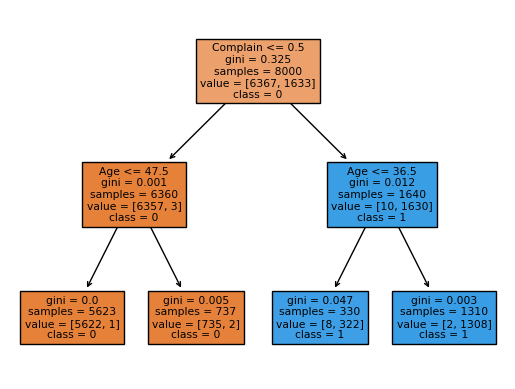

In [13]:
from sklearn.tree import plot_tree
plot_tree(dtc, feature_names=x.columns, class_names=[str(x) for x in dtc.classes_], filled=True)

In [14]:
y_train_pred_tree = dtc.predict(x_train)
y_test_pred_tree = dtc.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score

train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print("Tree acc in train", train_accuracy_tree)
print("Tree acc in test", test_accuracy_tree)

Tree acc in train 0.998375
Tree acc in test 0.9995


## Logistic Regression

In [16]:
from sklearn.linear_model import LinearRegression, LogisticRegression
lreg = LogisticRegression(random_state=0)
lreg.fit(x_train, y_train)

/home/kincaid/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [17]:
y_train_pred_lreg = lreg.predict(x_train)
y_test_pred_lreg = lreg.predict(x_test)

train_accuracy_lreg = accuracy_score(y_train, y_train_pred_lreg)
test_accuracy_lreg = accuracy_score(y_test, y_test_pred_lreg)

print("Lreg acc in train", train_accuracy_lreg)
print("Lreg acc in test", test_accuracy_lreg)

Lreg acc in train 0.998375
Lreg acc in test 0.9995


In [18]:
print(lreg.coef_)
print(lreg.feature_names_in_)

[[10.45622407  0.0533624 ]]
['Complain' 'Age']


## Matriz conf

LOGISTIC REGRESSION


/tmp/ipykernel_31385/2147196328.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1600x600 with 0 Axes>

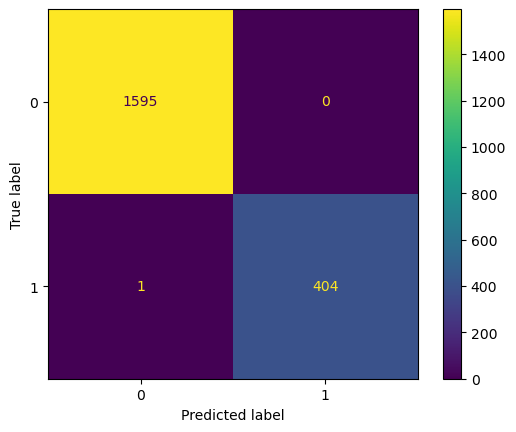

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig = plt.figure(figsize=(16,6))
conf_m_lreg = confusion_matrix(y_test, y_test_pred_lreg, labels=lreg.classes_)
disp_lreg = ConfusionMatrixDisplay(confusion_matrix = conf_m_lreg, display_labels=lreg.classes_)

disp_lreg.plot()
fig.show()
print("LOGISTIC REGRESSION")

DECISION TREE


/tmp/ipykernel_31385/4215305728.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1600x600 with 0 Axes>

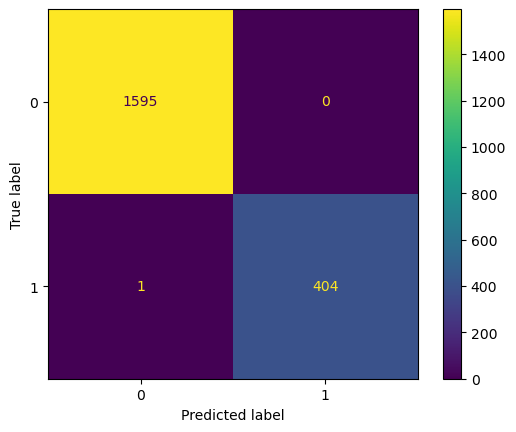

In [20]:
fig = plt.figure(figsize=(16,6))
conf_m_tree = confusion_matrix(y_test, y_test_pred_tree, labels=dtc.classes_)
disp_tree = ConfusionMatrixDisplay(confusion_matrix= conf_m_tree, display_labels = dtc.classes_)

disp_tree.plot()
fig.show()
print("DECISION TREE")